Performing (1+1)-GA


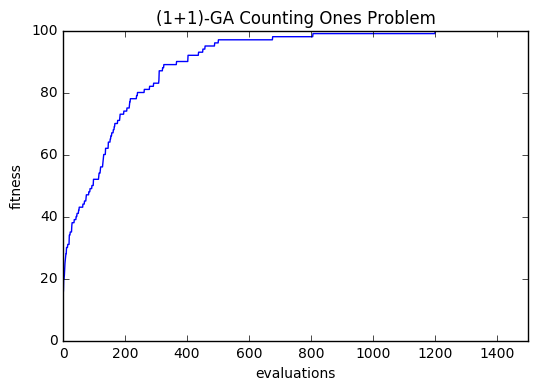

Best bit sequence: bitarray('1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111')
Best fitness: 100


In [20]:
%matplotlib inline
from bitarray import bitarray
import matplotlib.pyplot as plt
import random
import copy

def counting_ones(bitarray_instance):
    return bitarray_instance.count(True)

def multi_flip_binary(bitarray_instance, probability):
    for idx, val in enumerate(bitarray_instance):
        if random.random() < probability:
            bitarray_instance[idx] = not bitarray_instance[idx]
    return bitarray_instance        


def genetic_algorithm(objective_function, bitarray_length, evaluations):
    print('Performing (1+1)-GA')
    
    # (a) Generate random bitarray of length 'bitarray_length'
    best_bitarray = bitarray(bitarray_length)
    # Get the fitness of the current solution
    best_fitness = objective_function(best_bitarray)
    fitness_history = [best_fitness]
    
    # (d)
    for x in range(0, evaluations):
        # (b) Create a copy of this bitarray and invert each bit with probability 1/n
        best_bitarray_copy = copy.deepcopy(best_bitarray)
        mutated_bitarray = multi_flip_binary(best_bitarray_copy, 1/bitarray_length)
        mutated_bitarray_fitness = objective_function(mutated_bitarray)
        
        # (c) take the mutant if it is closer to the goal sequence
        if mutated_bitarray_fitness >= best_fitness:
            best_bitarray = mutated_bitarray
            best_fitness = mutated_bitarray_fitness
        
        fitness_history.append(best_fitness)
        
    axes = plt.gca()
    axes.set_xlim([0,evaluations])
    axes.set_ylim([0,bitarray_length])    
    plt.plot(fitness_history)
    plt.xlabel('evaluations')
    plt.ylabel('fitness')
    plt.title('(1+1)-GA Counting Ones Problem')

    plt.show()
    return [best_bitarray, best_fitness]
    

result = genetic_algorithm(counting_ones, 100, 1500)
print("Best bit sequence: " + str(result[0]))
print("Best fitness: " + str(result[1]))
